In [2]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import keras


In [3]:
def predict(img_rel_path, model):

    loaded_model = keras.models.load_model(model)

    img = image.load_img(img_rel_path, target_size=(300, 300))

    img = image.img_to_array(img, dtype=np.uint8)

    img = np.array(img)/255.0

    p = loaded_model.predict(img[np.newaxis, ...])

    labels = {0: 'Mariposa', 1: 'Libelula',
              2: 'Chapulin', 3: 'Mariquita', 4: 'Mosquito'}

    predicted_class = labels[np.argmax(p[0], axis=-1)]

    classes = []
    prob = []

    for i, j in enumerate(p[0], 0):
        classes.append(labels[i])
        prob.append(round(j*100, 2))
        print(labels[i], prob[i])

    plt.title("Es un/a " + predicted_class)
    plt.axis('off')
    plt.imshow(img.squeeze())
    plt.show()

    def plot_bar_x():
        index = np.arange(len(classes))
        plt.bar(index, prob)
        plt.xlabel('Insectos', fontsize=8)
        plt.ylabel('Probabilidad', fontsize=8)
        plt.xticks(index, classes, fontsize=8, rotation=20)
        plt.title('Gráfico de probabilidades')
        plt.show()
    plot_bar_x()


1/1 [==============================] - 1s 736ms/step
Mariposa 0.33
Libelula 99.59
Chapulin 0.06
Mariquita 0.0
Mosquito 0.02


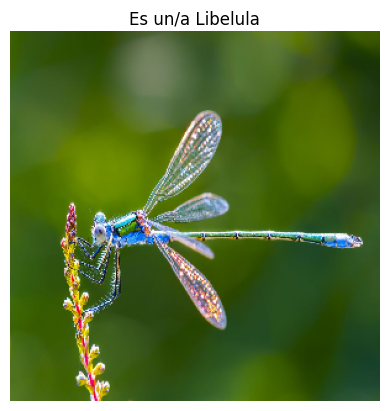

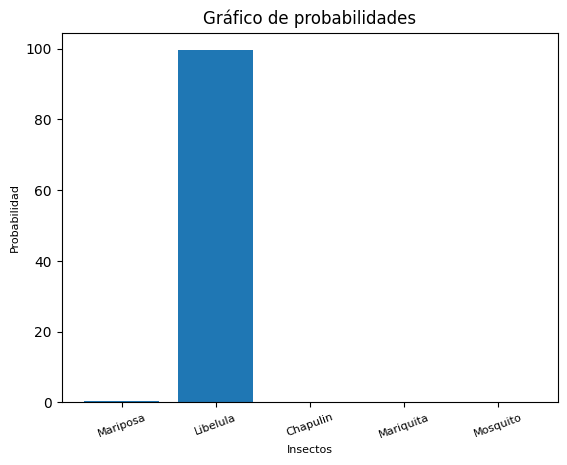

In [4]:
img_insect = "../ImagenesPrueba/dragonFly.jpg"# Imagen a clasificar (Cualquie imagen tipo .png, .jpg, .jepg)
n_model = "../Modelos/model3.h5"  # Archibo del modelo

predict(img_insect, n_model)
